In [1]:
# Import Dependancies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
# Create file path
path = 'Cleaned_Crimes_-_2016_to_present.csv'

# Read csv file with pandas
df = pd.read_csv(path, encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [5]:
crime_dfrows_with_nan = df[df.isnull().any(axis=1)]
crime_dfrows_with_nan.head(50)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location


In [6]:
crime_count = df.groupby('Primary Type').size()
crime_count.sort_values(ascending=False)

Primary Type
THEFT                                489381
BATTERY                              402701
CRIMINAL DAMAGE                      243963
ASSAULT                              179954
DECEPTIVE PRACTICE                   148930
OTHER OFFENSE                        137443
MOTOR VEHICLE THEFT                  130405
BURGLARY                              85359
ROBBERY                               84639
NARCOTICS                             77808
WEAPONS VIOLATION                     61349
CRIMINAL TRESPASS                     47136
OFFENSE INVOLVING CHILDREN            17490
PUBLIC PEACE VIOLATION                10233
SEX OFFENSE                            9693
CRIMINAL SEXUAL ASSAULT                7994
INTERFERENCE WITH PUBLIC OFFICER       7366
HOMICIDE                               6028
CRIM SEXUAL ASSAULT                    5098
ARSON                                  4150
PROSTITUTION                           4028
STALKING                               2682
LIQUOR LAW VIOLATIO

In [7]:
df.columns.to_list()

['Unnamed: 0',
 'ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [8]:
 filtered_df = df[df['Primary Type'].isin(['THEFT', 'BURGLARY', 'ROBBERY'])]
#filtered_df = df[df['Primary Type'].isin(['THEFT'])]
filtered_df.head(50)


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
2,2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
17,17,13210062,JG423596,08/27/2023 07:00:00 AM,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,...,30.0,21.0,06,1151117.0,1922554.0,2023,09/16/2023 03:41:56 PM,41.943379,-87.719974,"(41.943378528, -87.7199738)"
19,19,13210060,JG423567,08/15/2023 02:20:00 PM,077XX S SPAULDING AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,False,...,18.0,70.0,06,1155724.0,1853097.0,2023,09/16/2023 03:41:56 PM,41.752689,-87.704909,"(41.752688801, -87.704908791)"
21,21,13210071,JG421086,09/03/2023 10:27:00 AM,089XX S LOOMIS ST,0890,THEFT,FROM BUILDING,APARTMENT,False,...,21.0,73.0,06,1168564.0,1845472.0,2023,09/16/2023 03:41:56 PM,41.731498,-87.658075,"(41.731497731, -87.658074565)"
22,22,13210035,JG422370,08/17/2023 07:00:00 AM,019XX W 71ST ST,0820,THEFT,$500 AND UNDER,STREET,False,...,17.0,67.0,06,1164749.0,1857588.0,2023,09/16/2023 03:41:56 PM,41.764827,-87.671709,"(41.764827083, -87.671709119)"
26,26,13272487,JG498648,11/10/2023 05:30:00 AM,019XX N AUSTIN AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,29.0,25.0,06,1136098.0,1912178.0,2023,11/18/2023 03:40:25 PM,41.915187,-87.775425,"(41.915187259, -87.775425225)"
30,30,13272745,JG498891,11/10/2023 12:15:00 PM,009XX N FRANCISCO AVE,031A,ROBBERY,ARMED - HANDGUN,STREET,False,...,26.0,24.0,03,1156878.0,1906242.0,2023,11/18/2023 03:40:25 PM,41.898502,-87.699242,"(41.89850206, -87.69924242)"
32,32,11662417,JC232642,04/21/2019 12:30:00 PM,009XX E 80TH ST,031A,ROBBERY,ARMED - HANDGUN,RESIDENCE,False,...,8.0,44.0,03,1184044.0,1852159.0,2019,09/14/2023 03:41:59 PM,41.749500,-87.601157,"(41.749500329, -87.6011574)"
34,34,12342615,JE202211,04/17/2021 03:20:00 PM,081XX S PRAIRIE AVE,0325,ROBBERY,VEHICULAR HIJACKING,RESIDENCE,True,...,6.0,44.0,03,1179448.0,1851073.0,2021,09/14/2023 03:41:59 PM,41.746626,-87.618032,"(41.746626309, -87.618031954)"
49,52,13179181,JG386523,08/17/2023 03:15:00 PM,020XX N MILWAUKEE AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,1.0,22.0,06,1159682.0,1913243.0,2023,09/14/2023 03:41:59 PM,41.917656,-87.688750,"(41.917656022, -87.688750258)"


In [9]:
filtered_df.count()

Unnamed: 0              659379
ID                      659379
Case Number             659379
Date                    659379
Block                   659379
IUCR                    659379
Primary Type            659379
Description             659379
Location Description    659379
Arrest                  659379
Domestic                659379
Beat                    659379
District                659379
Ward                    659379
Community Area          659379
FBI Code                659379
X Coordinate            659379
Y Coordinate            659379
Year                    659379
Updated On              659379
Latitude                659379
Longitude               659379
Location                659379
dtype: int64

In [10]:
unique_description = filtered_df['Description'].unique().tolist()
print(unique_description)

['UNLAWFUL ENTRY', '$500 AND UNDER', 'OVER $500', 'FROM BUILDING', 'ARMED - HANDGUN', 'VEHICULAR HIJACKING', 'RETAIL THEFT', 'ARMED - OTHER FIREARM', 'AGGRAVATED VEHICULAR HIJACKING', 'ATTEMPT FORCIBLE ENTRY', 'FORCIBLE ENTRY', 'THEFT FROM MOTOR VEHICLE', 'STRONG ARM - NO WEAPON', 'AGGRAVATED', 'ARMED - OTHER DANGEROUS WEAPON', 'ATTEMPT ARMED - HANDGUN', 'POCKET-PICKING', 'ATTEMPT AGGRAVATED', 'HOME INVASION', 'ARMED - KNIFE / CUTTING INSTRUMENT', 'BURGLARY FROM MOTOR VEHICLE', 'ATTEMPT STRONG ARM - NO WEAPON', 'ATTEMPT THEFT', 'ATTEMPT ARMED - KNIFE / CUTTING INSTRUMENT', 'PURSE-SNATCHING', 'ATTEMPT ARMED - OTHER DANGEROUS WEAPON', 'FROM COIN-OPERATED MACHINE OR DEVICE', 'DELIVERY CONTAINER THEFT', 'ATTEMPT ARMED - OTHER FIREARM', 'STRONGARM - NO WEAPON', 'ATTEMPT: ARMED-HANDGUN', 'ARMED: HANDGUN', 'ATTEMPT: STRONGARM-NO WEAPON', 'ATTEMPT: ARMED-OTHER DANG WEAP', 'ATTEMPT: ARMED-KNIFE/CUT INSTR', 'ARMED: OTHER FIREARM', 'ARMED:KNIFE/CUTTING INSTRUMENT', 'ARMED: OTHER DANGEROUS WEAPON'

In [11]:
crime_over_50k = filtered_df.groupby('Description').filter(lambda x: len(x) >= 5000)
#crime_over_50k = filtered_df[filtered_df.groupby('Description').count() <= 50000]
# crime_over_50k.head()
#crime_['Description'].hist()
#plt.xticks(rotation=50)
#plt.show()

list_50 = crime_over_50k['Description'].unique().tolist()
print(list_50)

['UNLAWFUL ENTRY', '$500 AND UNDER', 'OVER $500', 'FROM BUILDING', 'ARMED - HANDGUN', 'RETAIL THEFT', 'AGGRAVATED VEHICULAR HIJACKING', 'FORCIBLE ENTRY', 'STRONG ARM - NO WEAPON', 'POCKET-PICKING', 'STRONGARM - NO WEAPON', 'ARMED: HANDGUN']


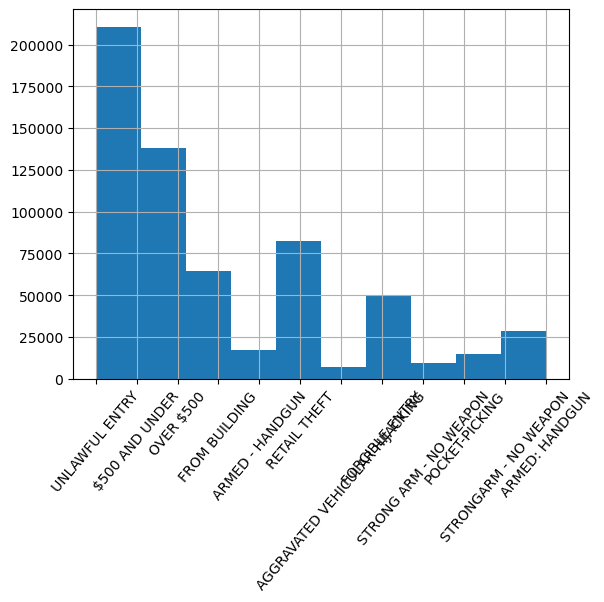

In [12]:
crime_over_50k['Description'].hist()
plt.xticks(rotation=50)
plt.show()

In [13]:
crime = filtered_df.groupby('Description').size() 
crime.sort_values(ascending=False)

Description
$500 AND UNDER                                181292
OVER $500                                     137895
RETAIL THEFT                                   82377
FROM BUILDING                                  64395
FORCIBLE ENTRY                                 49404
UNLAWFUL ENTRY                                 29309
ARMED - HANDGUN                                17222
ARMED: HANDGUN                                 15381
POCKET-PICKING                                 14828
STRONGARM - NO WEAPON                          13175
STRONG ARM - NO WEAPON                          9685
AGGRAVATED VEHICULAR HIJACKING                  6955
AGGRAVATED                                      4563
ATTEMPT FORCIBLE ENTRY                          3992
PURSE-SNATCHING                                 3805
ATTEMPT THEFT                                   3236
VEHICULAR HIJACKING                             3000
HOME INVASION                                   2318
ARMED:KNIFE/CUTTING INSTRUMENT    

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

In [15]:
# Next, define pandemic periods
df['Pandemic Period'] = pd.cut(
    df['Date'],
    bins=[
        pd.Timestamp('2017-01-01'),
        pd.Timestamp('2020-01-31'),
        pd.Timestamp('2023-05-11'),
        pd.Timestamp('2024-10-25'),
    ],
    labels=['Before Pandemic', 'During Pandemic', 'After Pandemic'],
    right = False # This makes the right edge of each bin exclusive 
)
# Basic stats and summary by period
print(df.info())
print(df.groupby('Pandemic Period').size())

# Filter data for relevant columns
crime_location_data = df[['Date', 'Primary Type', 'Block', 'Latitude', 'Longitude', 'Pandemic Period']].dropna()

crime_location_data = crime_location_data[
    (crime_location_data['Latitude'] != 0.0) & # Removes any undifined/missing latitude values
    (crime_location_data['Longitude'] != 0.0) & # Removes any undifined/missing longitude values
    (crime_location_data['Latitude'] > 37.0) # Removes unfortunate outlier
]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171288 entries, 0 to 2171287
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Unnamed: 0            int64         
 1   ID                    int64         
 2   Case Number           object        
 3   Date                  datetime64[ns]
 4   Block                 object        
 5   IUCR                  object        
 6   Primary Type          object        
 7   Description           object        
 8   Location Description  object        
 9   Arrest                bool          
 10  Domestic              bool          
 11  Beat                  int64         
 12  District              float64       
 13  Ward                  float64       
 14  Community Area        float64       
 15  FBI Code              object        
 16  X Coordinate          float64       
 17  Y Coordinate          float64       
 18  Year                  int64         
 19  

C:\Users\mwill\AppData\Local\Temp\ipykernel_36112\523175352.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Pandemic Period').size())


In [16]:
df['Season'] = np.where(df['Date'].dt.month == 1, 'Winter',
                      np.where(df['Date'].dt.month == 2, 'Winter',
                      np.where(df['Date'].dt.month == 3, 'Spring',
                      np.where(df['Date'].dt.month == 4, 'Spring',
                      np.where(df['Date'].dt.month == 5, 'Spring',
                      np.where(df['Date'].dt.month == 6, 'Summer',
                      np.where(df['Date'].dt.month == 7, 'Summer',
                      np.where(df['Date'].dt.month == 8, 'Summer',
                      np.where(df['Date'].dt.month == 9, 'Fall',
                      np.where(df['Date'].dt.month == 10, 'Fall',
                      np.where(df['Date'].dt.month == 11, 'Fall',
                      np.where(df['Date'].dt.month == 12, 'Winter', 'Unknown'))))))))))))

<Axes: xlabel='Season'>

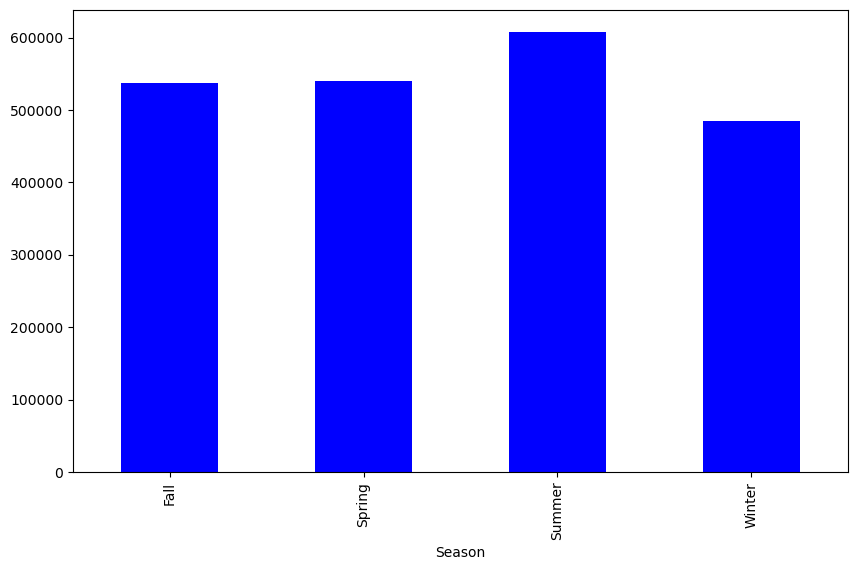

In [17]:
df.head()
season_count = df.groupby( 'Season').size()
season_count.plot(kind='bar', figsize=(10,6), color='blue')

<Axes: xlabel='Year'>

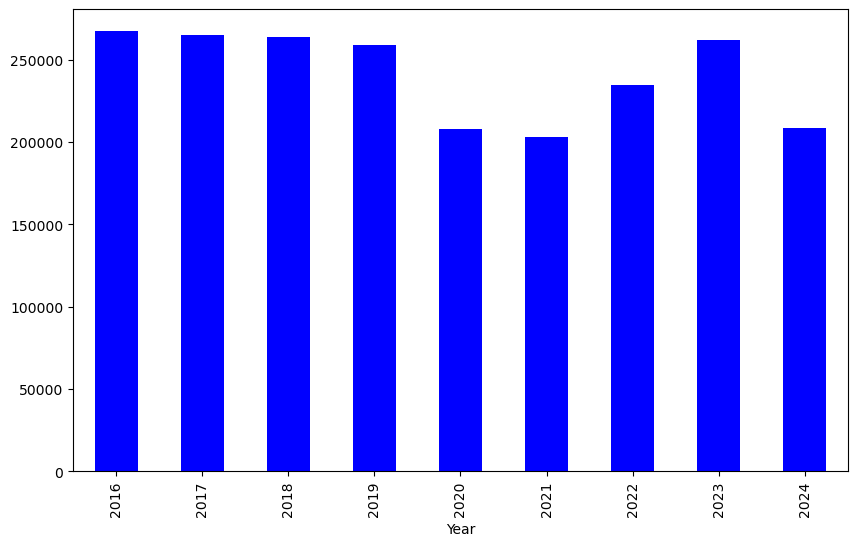

In [33]:
total_count = df.groupby('Year').size()
total_count.plot(kind='bar', figsize=(10,6), color='blue')

In [85]:
#arrest_count = df.groupby(['Year', 'Arrest']).size()
percentage_true = df.groupby('Year')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
percentage_true['percentage_true'] = (percentage_true['true_count'] / percentage_true['total_count']) * 100
percentage_true

,Year,total_count,true_count,percentage_true
0,2016,267270,52857,19.776630
1,2017,264964,52280,19.730982
2,2018,263552,52943,20.088256
3,2019,259158,56105,21.648955
4,2020,207947,33805,16.256546
5,2021,202857,25084,12.365361
6,2022,234879,27239,11.597035
7,2023,261932,31537,12.040148
8,2024,208729,27567,13.207077


In [88]:
period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
period_percentage_true['percentage_true'] = (period_percentage_true['true_count'] / period_percentage_true['total_count']) * 100
period_percentage_true

C:\Users\mwill\AppData\Local\Temp\ipykernel_36112\1034429506.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_percentage_true = df.groupby('Pandemic Period')['Arrest'].agg(


,Pandemic Period,total_count,true_count,percentage_true
0,Before Pandemic,806624,165693,20.541541
1,During Pandemic,714420,92672,12.971641
2,After Pandemic,382974,48195,12.584405


Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

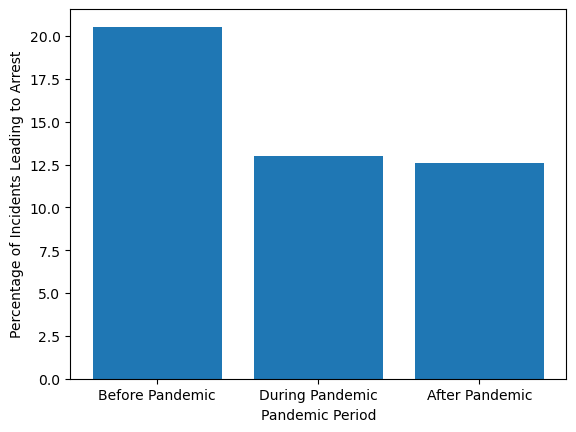

In [90]:
plt.bar(period_percentage_true['Pandemic Period'], period_percentage_true['percentage_true'], label='Total')
plt.xlabel('Pandemic Period')
plt.ylabel('Percentage of Incidents Leading to Arrest')

Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

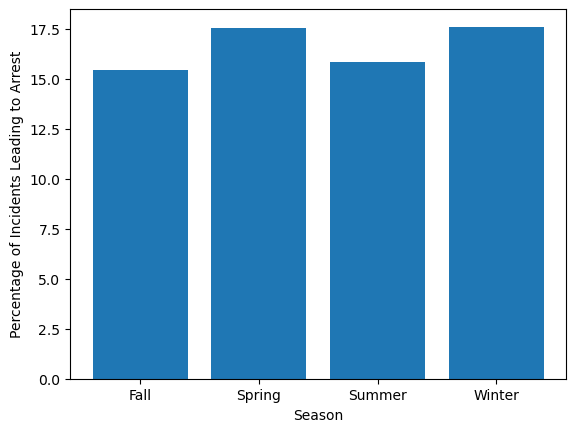

In [91]:
season_percentage_true = df.groupby('Season')['Arrest'].agg(
    total_count='count',
    true_count='sum'
).reset_index()
season_percentage_true['percentage_true'] = (season_percentage_true['true_count'] / season_percentage_true['total_count']) * 100
plt.bar(season_percentage_true['Season'], season_percentage_true['percentage_true'], label='Total')
plt.xlabel('Season')
plt.ylabel('Percentage of Incidents Leading to Arrest')

Text(0, 0.5, 'Percentage of Incidents Leading to Arrest')

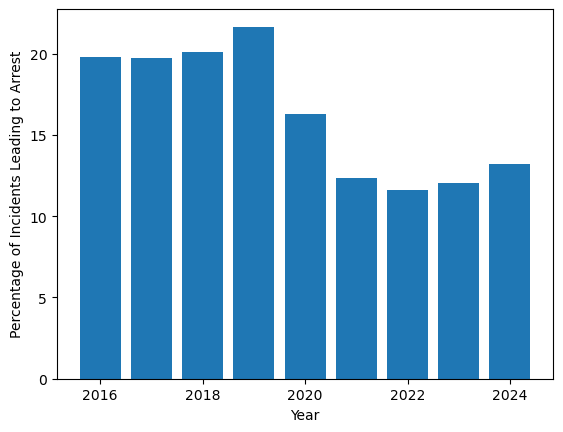

In [82]:
#plt.bar(percentage_true['Year'], percentage_true['total_count'])
#plt.bar(percentage_true['Year'], percentage_true['true_count'])
plt.bar(percentage_true['Year'], percentage_true['percentage_true'], label='Total')
plt.xlabel('Year')
plt.ylabel('Percentage of Incidents Leading to Arrest')
#for index, value in enumerate(percentage_true['percentage_true']):
    #plt.text(index, value, str(value), ha='center', va='bottom')
#plt.show()

Text(0, 0.5, 'Arrests')

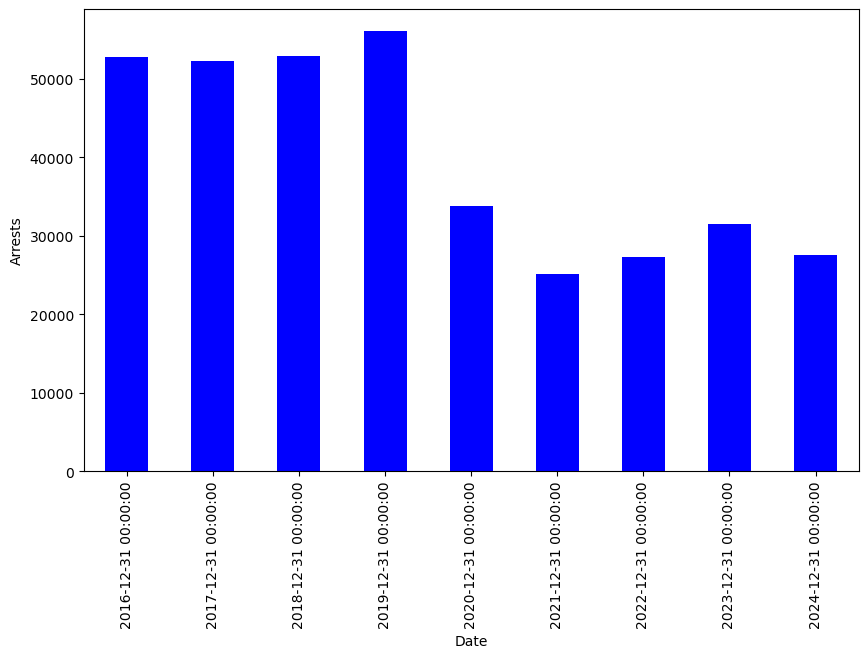

In [19]:
all_arrests = df[df['Arrest'] == 1]
all_arrests.head()
all_arrests.set_index('Date', inplace=True)
arrests = all_arrests.resample('YE').size()
arrests.plot(kind='bar', figsize=(10,6), color='blue')
plt.ylabel('Arrests')
#plt.show()

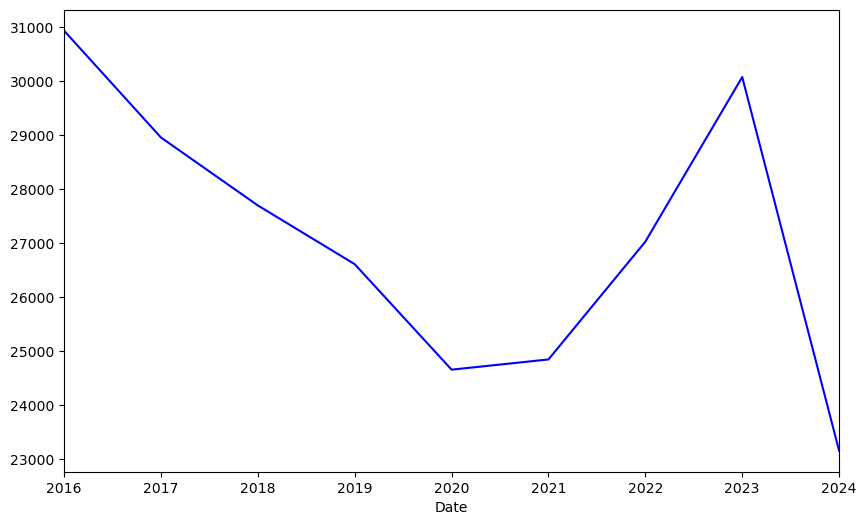

In [20]:
filtered2 = df[df['Primary Type'] == 'CRIMINAL DAMAGE']
filtered2.set_index('Date', inplace=True)
crim_dmg = filtered2.resample('YE').size()
crim_dmg.plot(kind='line', figsize=(10,6), color='blue')
plt.show()

<Axes: xlabel='Season'>

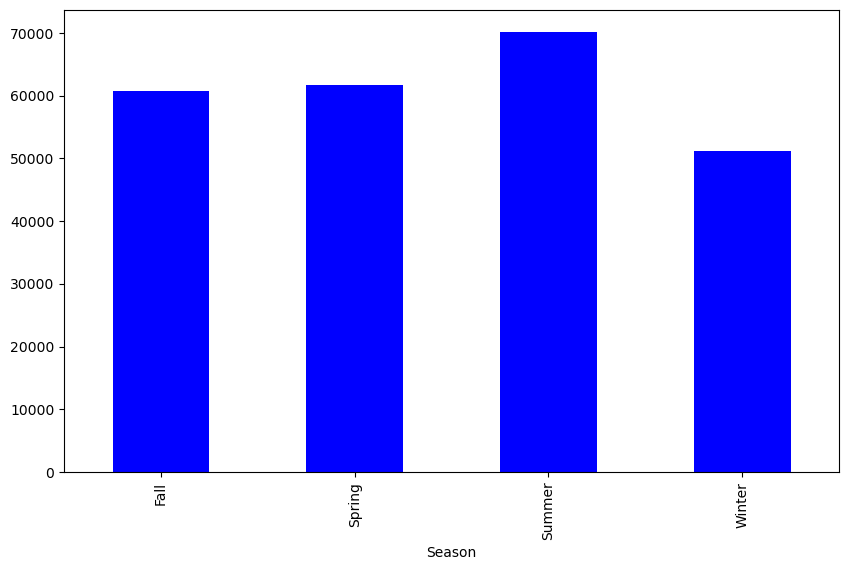

In [21]:
criminal_dmg_season = filtered2.groupby( 'Season').size()
criminal_dmg_season
criminal_dmg_season.plot(kind='bar', figsize=(10,6), color='blue')

In [22]:
filtered2

,Unnamed: 0,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Pandemic Period,Season
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-06 17:00:00,4,13203321,JG415333,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)",After Pandemic,Fall
2023-09-04 21:30:00,18,13210107,JG411849,053XX S HOMAN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,False,False,...,14,1154617.0,1869046.0,2023,09/16/2023 03:41:56 PM,41.796477,-87.708541,"(41.796477414, -87.708540915)",After Pandemic,Fall
2023-08-20 04:30:00,55,13181797,JG389859,020XX N LEAMINGTON AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,True,...,14,1141753.0,1913164.0,2023,09/14/2023 03:41:59 PM,41.917790,-87.754625,"(41.917790125, -87.754624625)",After Pandemic,Summer
2023-08-28 06:23:00,67,13190943,JG400635,027XX N NARRAGANSETT AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),True,False,...,14,1133273.0,1917606.0,2023,09/14/2023 03:41:59 PM,41.930132,-87.785677,"(41.9301323, -87.785676799)",After Pandemic,Summer
2023-08-29 13:59:00,68,13192516,JG402535,014XX N LOCKWOOD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,True,True,...,14,1140764.0,1909050.0,2023,09/14/2023 03:41:59 PM,41.906519,-87.758360,"(41.906519104, -87.758359629)",After Pandemic,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-12 21:00:00,2202499,13138771,JG338931,014XX N WOOD ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,14,1164126.0,1909908.0,2023,08/19/2023 03:40:26 PM,41.908412,-87.672517,"(41.908411741, -87.67251728)",After Pandemic,Summer
2023-08-16 03:24:00,2202505,13177265,JG384531,051XX S PRAIRIE AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,14,1178912.0,1871028.0,2023,09/01/2023 03:42:06 PM,41.801397,-87.619389,"(41.801397102, -87.619388961)",After Pandemic,Summer
2023-05-16 14:00:00,2202522,13075643,JG263877,050XX W JACKSON BLVD,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,14,1142809.0,1898200.0,2023,08/19/2023 03:40:26 PM,41.876708,-87.751118,"(41.87670756, -87.751117882)",After Pandemic,Spring


In [23]:
byblock = filtered2.groupby('Block').size()
byblock.sort_values(ascending=False)

Block
077XX N HASKINS AVE                    483
098XX S STATE ST                       411
056XX S KILPATRICK AVE                 335
064XX S DR MARTIN LUTHER KING JR DR    236
033XX W LAWRENCE AVE                   195
                                      ... 
020XX E 122ND ST                         1
007XX N Aberdeen St                      1
058XX N WHIPPLE ST                       1
038XX W PIPPIN ST                        1
067XX N SACRAMENTO AVE                   1
Length: 27952, dtype: int64

In [24]:
description = filtered2.groupby('Description').size()
description.sort_values(ascending=False)

Description
TO VEHICLE                     119618
TO PROPERTY                    112846
CRIMINAL DEFACEMENT              6002
TO CITY OF CHICAGO PROPERTY      4473
TO STATE SUP PROP                 522
TO STATE SUPPORTED PROPERTY       341
INSTITUTIONAL VANDALISM           120
TO FIRE FIGHT.APP.EQUIP            31
LIBRARY VANDALISM                  10
dtype: int64

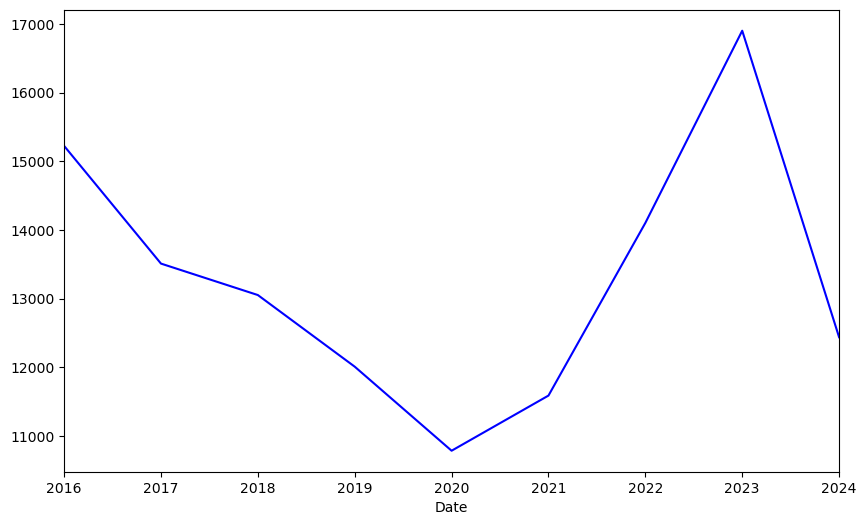

In [25]:
filtered3 = filtered2[filtered2['Description'] == 'TO VEHICLE']
to_vehicle = filtered3.resample('YE').size()
to_vehicle.plot(kind='line', figsize=(10,6), color='blue')
plt.show()

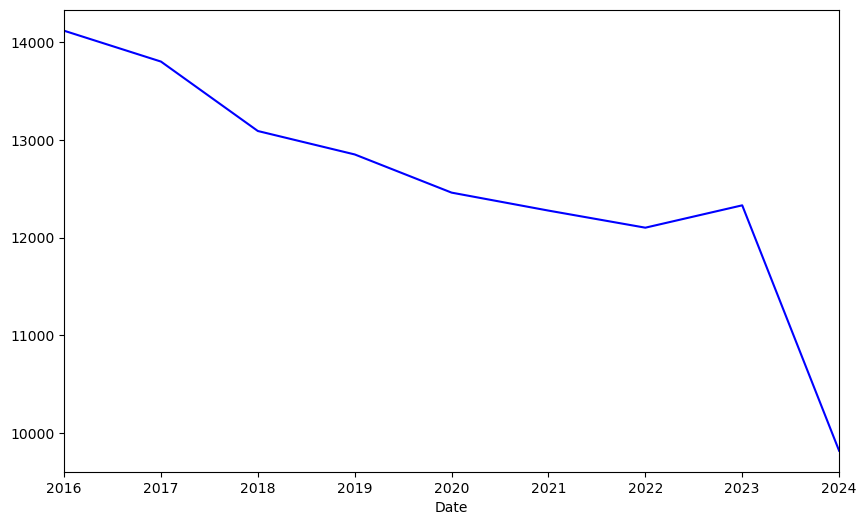

In [26]:
filtered4 = filtered2[filtered2['Description'] == 'TO PROPERTY']
to_property = filtered4.resample('YE').size()
to_property
to_property.plot(kind='line', figsize=(10,6), color='blue')
plt.show()

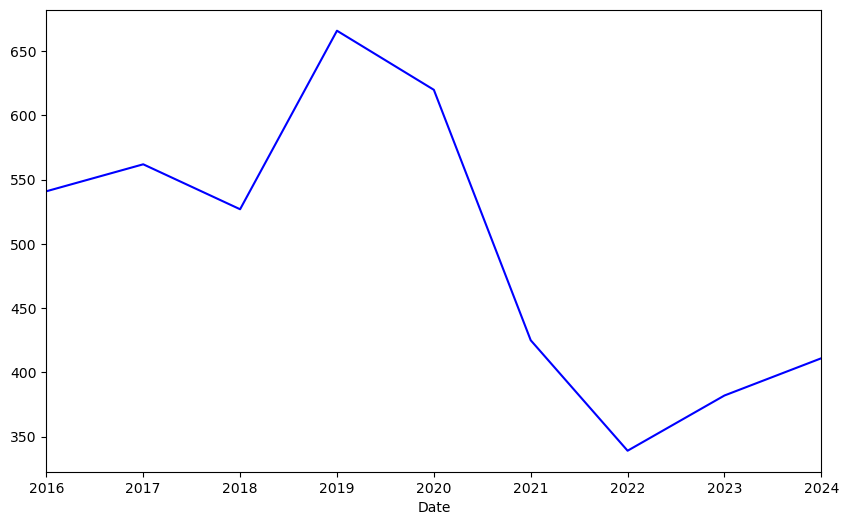

In [27]:
filtered5 = filtered2[filtered2['Description'] == 'TO CITY OF CHICAGO PROPERTY']
to_city = filtered5.resample('YE').size()
to_city.plot(kind='line', figsize=(10,6), color='blue')
plt.show()

C:\Users\mwill\AppData\Local\Temp\ipykernel_36112\884781976.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  arrest = filtered6.resample('Y').size()


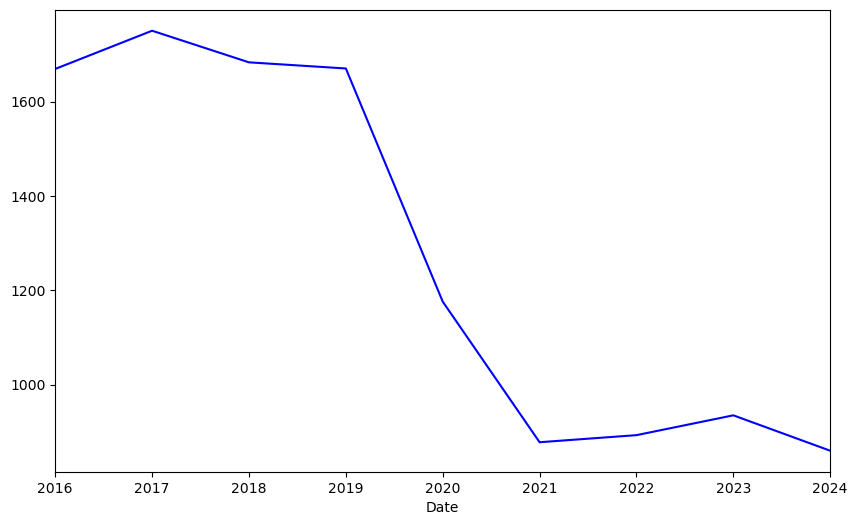

In [28]:
filtered6 = filtered2[filtered2['Arrest'] == 1]
arrest = filtered6.resample('Y').size()
arrest.plot(kind='line', figsize=(10,6), color='blue')
plt.show()

In [29]:
period_arrests = df.groupby(['Arrest', 'Pandemic Period']).size()
period_arrests

C:\Users\mwill\AppData\Local\Temp\ipykernel_36112\2912699533.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  period_arrests = df.groupby(['Arrest', 'Pandemic Period']).size()


Arrest  Pandemic Period
False   Before Pandemic    640931
        During Pandemic    621748
        After Pandemic     334779
True    Before Pandemic    165693
        During Pandemic     92672
        After Pandemic      48195
dtype: int64

In [30]:
crimdmg_arrest_season = filtered6.groupby(['Arrest', 'Season']).size()
crimdmg_arrest_season

Arrest  Season
True    Fall      2670
        Spring    3111
        Summer    3258
        Winter    2475
dtype: int64

In [31]:
location_description = filtered2.groupby('Location Description').size()
location_description.sort_values(ascending=False)

Location Description
STREET                                             88379
RESIDENCE                                          39699
APARTMENT                                          38427
PARKING LOT / GARAGE (NON RESIDENTIAL)              7434
PARKING LOT/GARAGE(NON.RESID.)                      5939
                                                   ...  
VEHICLE - COMMERCIAL: TROLLEY BUS                      2
CASINO/GAMBLING ESTABLISHMENT                          2
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS        1
VEHICLE-COMMERCIAL - TROLLEY BUS                       1
AIRPORT/AIRCRAFT                                       1
Length: 141, dtype: int64

In [32]:
unique_location_description = filtered2['Location Description'].unique().tolist()
unique_location_description

['PARKING LOT / GARAGE (NON RESIDENTIAL)',
 'RESIDENCE - GARAGE',
 'RESIDENCE',
 'APARTMENT',
 'STREET',
 'RESIDENCE - YARD (FRONT / BACK)',
 'RESIDENCE - PORCH / HALLWAY',
 'SCHOOL - PUBLIC BUILDING',
 'COMMERCIAL / BUSINESS OFFICE',
 'GOVERNMENT BUILDING / PROPERTY',
 'VEHICLE NON-COMMERCIAL',
 'CTA BUS',
 'ALLEY',
 'SMALL RETAIL STORE',
 'CEMETARY',
 'BAR OR TAVERN',
 'WAREHOUSE',
 'DRIVEWAY - RESIDENTIAL',
 'SCHOOL - PUBLIC GROUNDS',
 'SIDEWALK',
 'DEPARTMENT STORE',
 'CTA PARKING LOT / GARAGE / OTHER PROPERTY',
 'DRUG STORE',
 'RESTAURANT',
 'CTA TRAIN',
 'HOTEL / MOTEL',
 'GAS STATION',
 'SCHOOL - PRIVATE BUILDING',
 'VACANT LOT / LAND',
 'GROCERY FOOD STORE',
 'TAVERN / LIQUOR STORE',
 'AIRPORT PARKING LOT',
 'MEDICAL / DENTAL OFFICE',
 'OTHER (SPECIFY)',
 'CHA PARKING LOT / GROUNDS',
 'CONSTRUCTION SITE',
 'CAR WASH',
 'HOSPITAL BUILDING / GROUNDS',
 'COLLEGE / UNIVERSITY - GROUNDS',
 'VEHICLE - COMMERCIAL',
 'CHA APARTMENT',
 'BANK',
 'CHURCH / SYNAGOGUE / PLACE OF WORSHIP',
 